## Observations and Insights

## Dependencies and starter code

In [816]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

## Summary statistics

In [817]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summ_stats_columns = ["mean","median","variance","standard deviation","SEM"]
#mouse_ID_list = mouse_metadata['Mouse ID']
df_study_results_tumor_vol = pd.DataFrame(study_results.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
df_study_results_tumor_med = pd.DataFrame(study_results.groupby('Mouse ID')['Tumor Volume (mm3)'].median())
df_study_results_tumor_var = pd.DataFrame(study_results.groupby('Mouse ID')['Tumor Volume (mm3)'].var())
df_study_results_tumor_std = pd.DataFrame(study_results.groupby('Mouse ID')['Tumor Volume (mm3)'].std())
df_study_results_tumor_sem = pd.DataFrame(study_results.groupby('Mouse ID')['Tumor Volume (mm3)'].sem())

df_mouse_metadata.index.name = "Mouse ID index"
df_study_results_tumor_vol.index.name = 'Mouse ID index'
df_study_results_tumor_med.index.name = 'Mouse ID index'
# Generate a bar plot showing number of data points for each treatment regimen using pandas
study_results.groupby("Mouse ID")['Timepoint'].mean()
study_results_index = study_results.groupby("Mouse ID")['Tumor Volume (mm3)'].mean().index
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
mouse_metadata.reindex(study_results_index)

df_mouse_metadata = mouse_metadata.sort_values(by=['Mouse ID'])

#df_mouse_metadata.reset_index(drop=True, inplace=True)
#df_study_results_tumor_vol.reset_index(drop=True, inplace=True)

df_mouse_metadata.index = [study_results_index]


df_mouse_metadata = df_mouse_metadata.set_index('Mouse ID')
# Generate a pie plot showing the distribution of female versus male mice using pandas
study_results['Mouse ID'].value_counts()

#df_mouse_metadata['Avg Tumor Volume (mm3)'] = df_study_results_tumor_vol
df_mouse_metadata.index.name = None
#df_mouse_metadata.append(df_study_results_tumor_vol)
df_study_results_tumor_vol.reindex(study_results_index)
df_study_results_tumor_med.reindex(study_results_index)
df_mouse_metadata.index.name = "Mouse ID index"
df_study_results_tumor_vol.index.name = "Mouse ID index"
#Merged_dfs = df_mouse_metadata.merge(df_study_results_tumor_vol, on="Mouse ID index", how="left")
df_mouse_metadata.index.name = "Mouse ID index"
df_mouse_metadata['Tumor Volume Mean (mm3)'] = df_study_results_tumor_vol
df_mouse_metadata['Tumor Volume Median (mm3)'] = df_study_results_tumor_med
df_mouse_metadata['Tumor Volume Variance (mm3)'] = df_study_results_tumor_var
df_mouse_metadata['Tumor Volume Std (mm3)'] = df_study_results_tumor_std
df_mouse_metadata['Tumor Volume SEM (mm3)'] = df_study_results_tumor_sem
df_mouse_metadata


,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume Std (mm3),Tumor Volume SEM (mm3)
Mouse ID index,,,,,,,,,
a203,Infubinol,Female,20,23,56.312708,55.983272,50.407041,7.099792,2.245151
a251,Infubinol,Female,21,25,55.237095,55.938620,51.740730,7.193103,2.274659
a262,Placebo,Female,17,29,58.611631,58.572588,84.759928,9.206515,2.911356
a275,Ceftamin,Female,20,28,52.770965,52.044750,36.322924,6.026850,1.905857
a366,Stelasyn,Female,16,29,54.639906,55.265582,38.415384,6.198015,2.342629
...,...,...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,46.942214,47.115980,3.464898,1.861424,1.074693
z578,Ramicane,Male,11,16,38.411510,38.160380,17.969628,4.239060,1.340508
z581,Infubinol,Female,24,25,53.979584,53.062175,29.827123,5.461421,1.727053


## Bar plots

<BarContainer object of 10 artists>

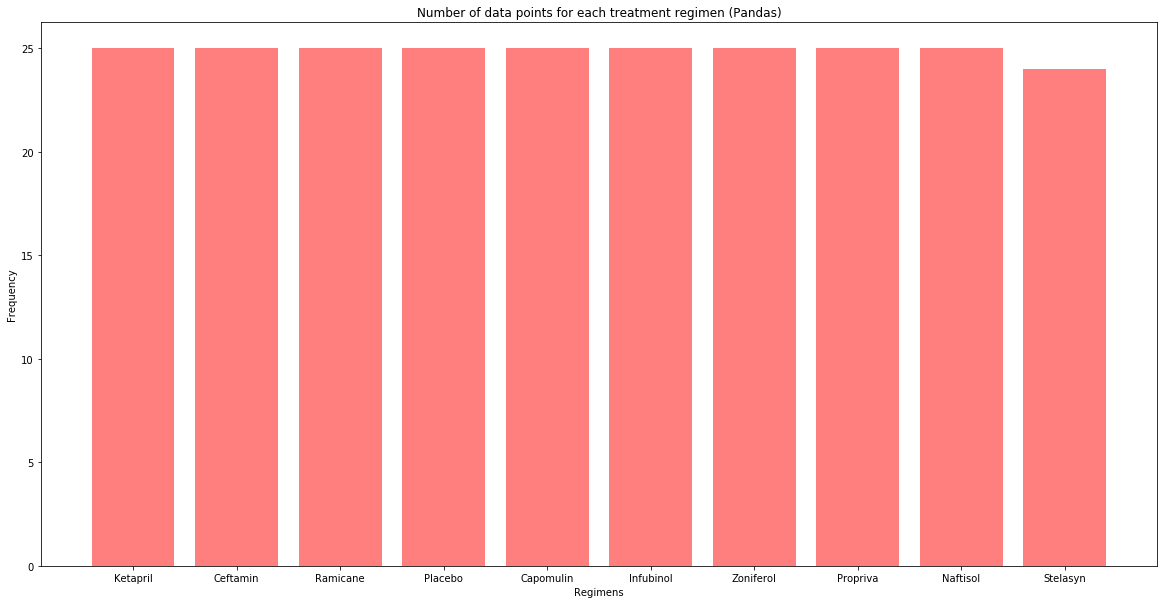

In [869]:
#number of regimens generated from length of unique value counts of regimen columns stored in x_bar_length
x_bar_length = len(df_mouse_metadata['Drug Regimen'].value_counts())
x_axis = np.arange(x_bar_length)

#Storing regimens as a list for the bar chart x axis
x_bar_bins = pd.DataFrame(df_mouse_metadata['Drug Regimen'].value_counts()).index.tolist()

#count for x frequency
x_bar_count = df_mouse_metadata['Drug Regimen'].value_counts()

#figure size change to see it better
plt.figure(figsize=(20,10))

#tick locations
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_bar_bins)

plt.title('Number of data points for each treatment regimen (Pandas)')
plt.xlabel('Regimens')
plt.ylabel('Frequency')

#plotting the bar chart
plt.bar(x_axis, df_mouse_metadata['Drug Regimen'].value_counts(), color='r', alpha=0.5, align="center")

#dimensions to spread it otu horizontally


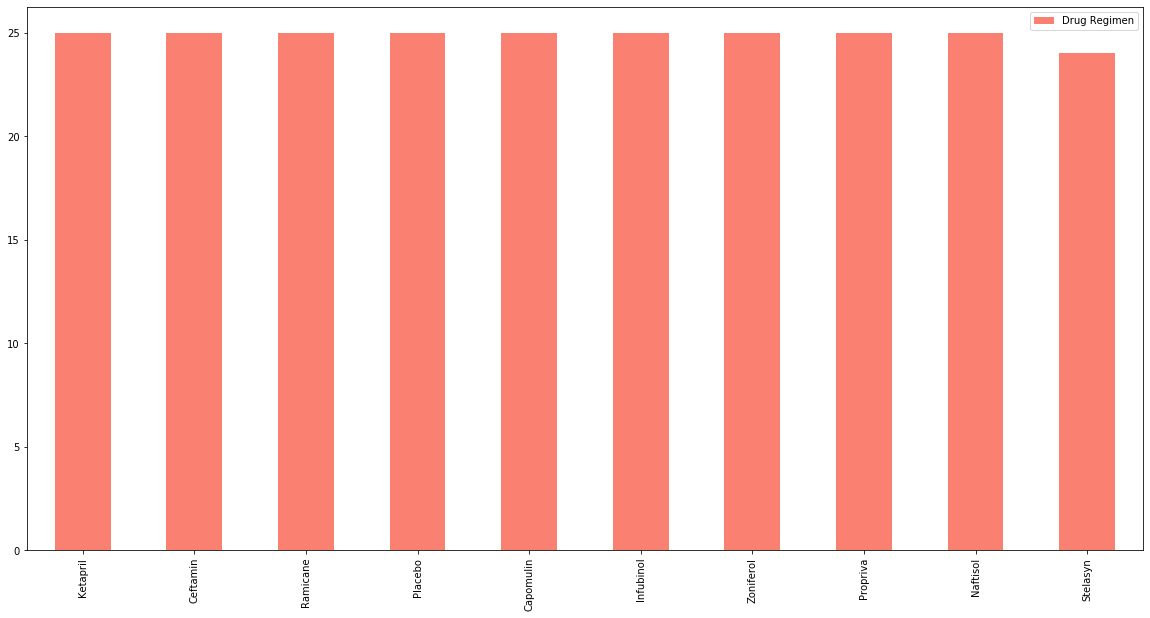

In [819]:

pd.DataFrame(df_mouse_metadata['Drug Regimen'].value_counts()).plot.bar(figsize=(20,10),color='Salmon')


In [820]:
x_bar_bins

['Ketapril',
 'Ceftamin',
 'Ramicane',
 'Placebo',
 'Capomulin',
 'Infubinol',
 'Zoniferol',
 'Propriva',
 'Naftisol',
 'Stelasyn']

## Pie plots

([<matplotlib.patches.Wedge at 0x2c005738288>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')],
 [Text(-0.0037850050782358134, 0.5999880613283548, '50.2%'),
  Text(0.00378500507823574, -0.5999880613283548, '49.8%')])

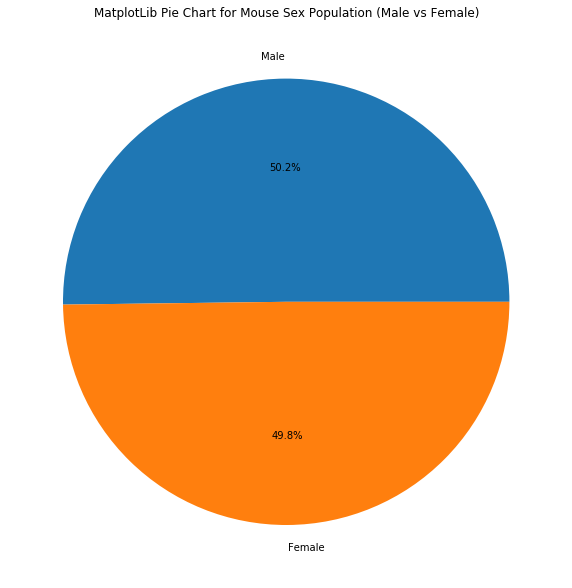

In [821]:
plt.figure(figsize=(10,20))
plt.title("MatplotLib Pie Chart for Mouse Sex Population (Male vs Female)")
pie_labels = list([df_mouse_metadata['Sex'].value_counts().index[0],df_mouse_metadata['Sex'].value_counts().index[1]])
pie_sizes= [df_mouse_metadata['Sex'].value_counts()[0] , df_mouse_metadata['Sex'].value_counts()[1]]
#plt.pie([73,44], labels=df_mouse_metadata['Sex'].value_counts()
plt.pie(pie_sizes, labels=pie_labels, autopct="%1.1f%%")


Text(0.5, 1.0, 'Pandas Pie Chart for Mouse Sex Population (Male vs Female)')

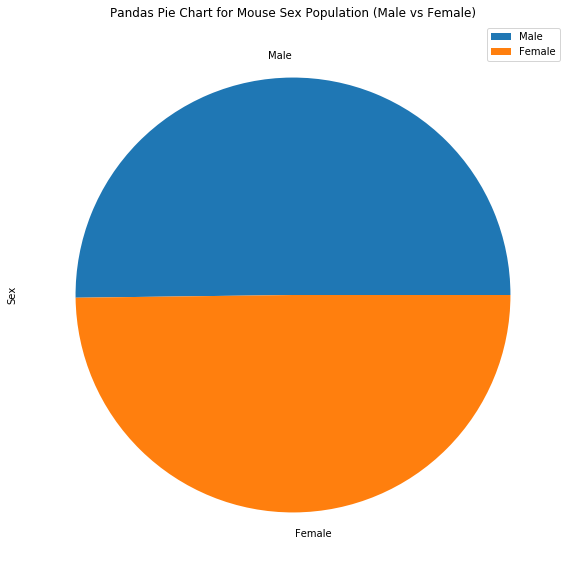

In [822]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

df_mouse_metadata['Sex'].value_counts().index


pd.DataFrame(df_mouse_metadata['Sex'].value_counts()).plot.pie(figsize=(20,10), subplots = True, )
plt.title("Pandas Pie Chart for Mouse Sex Population (Male vs Female)")

## Quartiles, outliers and boxplots

In [823]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#Added final tumor volumes to master DF
df_study_results_tumor_last = pd.DataFrame(study_results.groupby('Mouse ID')['Tumor Volume (mm3)'].last())
df_mouse_metadata["Final Tumor Volume (mm3)"] = df_study_results_tumor_last

#Loc'ed columns with drug regimen and final tumor volume
df_mouse_metadata
#df_mouse_metadata.iloc[:,[0, 9]]
#Filter "Drug Regimen" column by Capomulin, Ramicane, Infubinol, and Ceftamin and store in df_DR_and_Final_vol
df_DR_and_Final_vol = df_mouse_metadata[(df_mouse_metadata['Drug Regimen'] == 'Infubinol') | (df_mouse_metadata['Drug Regimen'] == 'Capomulin') | (df_mouse_metadata['Drug Regimen'] == 'Ramicane') | (df_mouse_metadata['Drug Regimen'] == 'Ceftamin')]
df_DR_and_Final_vol = df_DR_and_Final_vol.iloc[:,[0, 9]]
df_DR_and_Final_vol

,Drug Regimen,Final Tumor Volume (mm3)
Mouse ID index,,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a275,Ceftamin,62.999356
a411,Ramicane,38.407618
a444,Ramicane,43.047543
...,...,...
y769,Ceftamin,68.594745
y793,Capomulin,31.896238
y865,Ceftamin,64.729837


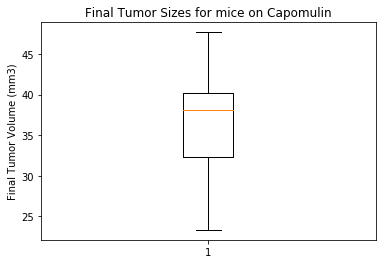

The lower quartile of Capomulin Tumor Volumes is: 32.37735684
The upper quartile of Capomulin Tumor Volumes is: 40.1592203
The interquartile range of Capomulin Tumor Volumes is: 7.781863460000004
The the median of Capomulin Tumor Volumes is: 38.125164399999996 
Capomulin values below 20.70456164999999 could be outliers.
Capomulin values above 51.83201549 could be outliers.


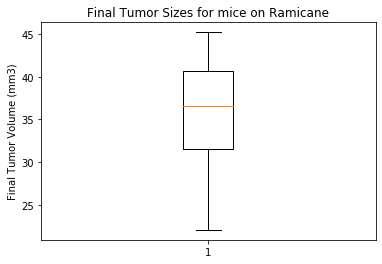

The lower quartile of Ramicane Tumor Volumes is: 31.56046955
The upper quartile of Ramicane Tumor Volumes is: 40.65900627
The interquartile range of Ramicane Tumor Volumes is: 9.098536719999998
The the median of Ramicane Tumor Volumes is: 36.56165229 
Ramicane values below 17.912664470000003 could be outliers.
Ramicane values above 54.30681135 could be outliers.


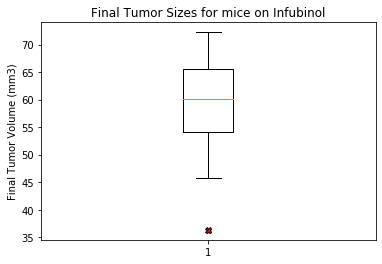

The lower quartile of Infubinol Tumor Volumes is: 54.04860769
The upper quartile of Infubinol Tumor Volumes is: 65.52574285
The interquartile range of Infubinol Tumor Volumes is: 11.477135160000003
The the median of Infubinol Tumor Volumes is: 60.16518046 
Infubinol values below 36.83290494999999 could be outliers.
Infubinol values above 82.74144559000001 could be outliers.


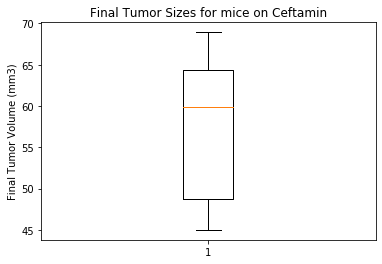

The lower quartile of Ceftamin Tumor Volumes is: 48.72207785
The upper quartile of Ceftamin Tumor Volumes is: 64.29983003
The interquartile range of Ceftamin Tumor Volumes is: 15.577752179999997
The the median of Ceftamin Tumor Volumes is: 59.85195552 
Ceftamin values below 25.355449580000002 could be outliers.
Ceftamin values above 87.66645829999999 could be outliers.


In [824]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
df_DR_and_Final_vol['Final Tumor Volume (mm3)'].max().round(2)

df_DR_and_Final_Capomulin = df_mouse_metadata[(df_mouse_metadata['Drug Regimen'] == 'Capomulin')].iloc[:,[0, 9]]
#Tumor volumes for final values stored in Tumor_Volumes
Tumor_Volumes_Capomulin_list = list(np.arange(df_DR_and_Final_Capomulin['Final Tumor Volume (mm3)'].min().round(2),df_DR_and_Final_vol['Final Tumor Volume (mm3)'].max().round(2) + 1, 1))
#Tumor_Volumes_Capomulin_series = (np.arange(df_DR_and_Final_Capomulin['Final Tumor Volume (mm3)'].min().round(2),df_DR_and_Final_vol['Final Tumor Volume (mm3)'].max().round(2) + 1, 1))

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Sizes for mice on Capomulin')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(list(df_DR_and_Final_Capomulin['Final Tumor Volume (mm3)']))
plt.show()
quartiles = df_DR_and_Final_Capomulin['Final Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin Tumor Volumes is: {lowerq}")
print(f"The upper quartile of Capomulin Tumor Volumes is: {upperq}")
print(f"The interquartile range of Capomulin Tumor Volumes is: {iqr}")
print(f"The the median of Capomulin Tumor Volumes is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin values below {lower_bound} could be outliers.")
print(f"Capomulin values above {upper_bound} could be outliers.")

df_DR_and_Final_vol['Final Tumor Volume (mm3)'].max().round(2)

df_DR_and_Final_Ramicane = df_mouse_metadata[(df_mouse_metadata['Drug Regimen'] == 'Ramicane')].iloc[:,[0, 9]]
#Tumor volumes for final values stored in Tumor_Volumes
Tumor_Volumes_Ramicane_list = list(np.arange(df_DR_and_Final_Ramicane['Final Tumor Volume (mm3)'].min().round(2),df_DR_and_Final_vol['Final Tumor Volume (mm3)'].max().round(2) + 1, 1))
#Tumor_Volumes_Ramicane_series = (np.arange(df_DR_and_Final_Ramicane['Final Tumor Volume (mm3)'].min().round(2),df_DR_and_Final_vol['Final Tumor Volume (mm3)'].max().round(2) + 1, 1))

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Sizes for mice on Ramicane')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(list(df_DR_and_Final_Ramicane['Final Tumor Volume (mm3)']))
plt.show()
quartiles = df_DR_and_Final_Ramicane['Final Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane Tumor Volumes is: {lowerq}")
print(f"The upper quartile of Ramicane Tumor Volumes is: {upperq}")
print(f"The interquartile range of Ramicane Tumor Volumes is: {iqr}")
print(f"The the median of Ramicane Tumor Volumes is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane values below {lower_bound} could be outliers.")
print(f"Ramicane values above {upper_bound} could be outliers.")

df_DR_and_Final_vol['Final Tumor Volume (mm3)'].max().round(2)

df_DR_and_Final_Infubinol = df_mouse_metadata[(df_mouse_metadata['Drug Regimen'] == 'Infubinol')].iloc[:,[0, 9]]
#Tumor volumes for final values stored in Tumor_Volumes
Tumor_Volumes_Infubinol_list = list(np.arange(df_DR_and_Final_Infubinol['Final Tumor Volume (mm3)'].min().round(2),df_DR_and_Final_vol['Final Tumor Volume (mm3)'].max().round(2) + 1, 1))
#Tumor_Volumes_Infubinol_series = (np.arange(df_DR_and_Final_Infubinol['Final Tumor Volume (mm3)'].min().round(2),df_DR_and_Final_vol['Final Tumor Volume (mm3)'].max().round(2) + 1, 1))

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Sizes for mice on Infubinol')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(list(df_DR_and_Final_Infubinol['Final Tumor Volume (mm3)']), flierprops=dict(markerfacecolor='r', marker='X'))
plt.show()
quartiles = df_DR_and_Final_Infubinol['Final Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol Tumor Volumes is: {lowerq}")
print(f"The upper quartile of Infubinol Tumor Volumes is: {upperq}")
print(f"The interquartile range of Infubinol Tumor Volumes is: {iqr}")
print(f"The the median of Infubinol Tumor Volumes is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol values below {lower_bound} could be outliers.")
print(f"Infubinol values above {upper_bound} could be outliers.")

df_DR_and_Final_vol['Final Tumor Volume (mm3)'].max().round(2)

df_DR_and_Final_Ceftamin = df_mouse_metadata[(df_mouse_metadata['Drug Regimen'] == 'Ceftamin')].iloc[:,[0, 9]]
#Tumor volumes for final values stored in Tumor_Volumes
Tumor_Volumes_Ceftamin_list = list(np.arange(df_DR_and_Final_Ceftamin['Final Tumor Volume (mm3)'].min().round(2),df_DR_and_Final_vol['Final Tumor Volume (mm3)'].max().round(2) + 1, 1))
#Tumor_Volumes_Ceftamin_series = (np.arange(df_DR_and_Final_Ceftamin['Final Tumor Volume (mm3)'].min().round(2),df_DR_and_Final_vol['Final Tumor Volume (mm3)'].max().round(2) + 1, 1))

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Sizes for mice on Ceftamin')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(list(df_DR_and_Final_Ceftamin['Final Tumor Volume (mm3)']),)
plt.show()
quartiles = df_DR_and_Final_Ceftamin['Final Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin Tumor Volumes is: {lowerq}")
print(f"The upper quartile of Ceftamin Tumor Volumes is: {upperq}")
print(f"The interquartile range of Ceftamin Tumor Volumes is: {iqr}")
print(f"The the median of Ceftamin Tumor Volumes is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin values below {lower_bound} could be outliers.")
print(f"Ceftamin values above {upper_bound} could be outliers.")


## Line and scatter plots

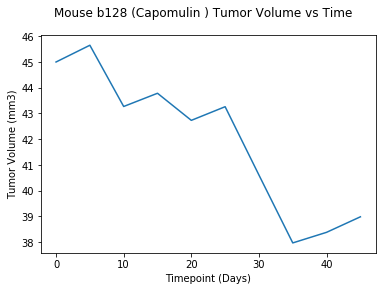

<Figure size 14400x720 with 0 Axes>

In [837]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Chose b128 as mouse because it was first. loc in timepoint, Mouse ID, and tumor vol
df_b128_tumor_vol = study_results.loc[study_results['Mouse ID'] == 'b128', ['Timepoint','Mouse ID','Tumor Volume (mm3)']]
#Set timepoint and tumor as series
series_b128_tumor_vol = df_b128_tumor_vol['Tumor Volume (mm3)']
series_b128_timepoint = df_b128_tumor_vol['Timepoint']

#called in series as axis
plt.plot(series_b128_timepoint, series_b128_tumor_vol)

#labelled axis and title
plt.suptitle('Mouse b128 (Capomulin ) Tumor Volume vs Time')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.figure(figsize=(200,10))
plt.show()

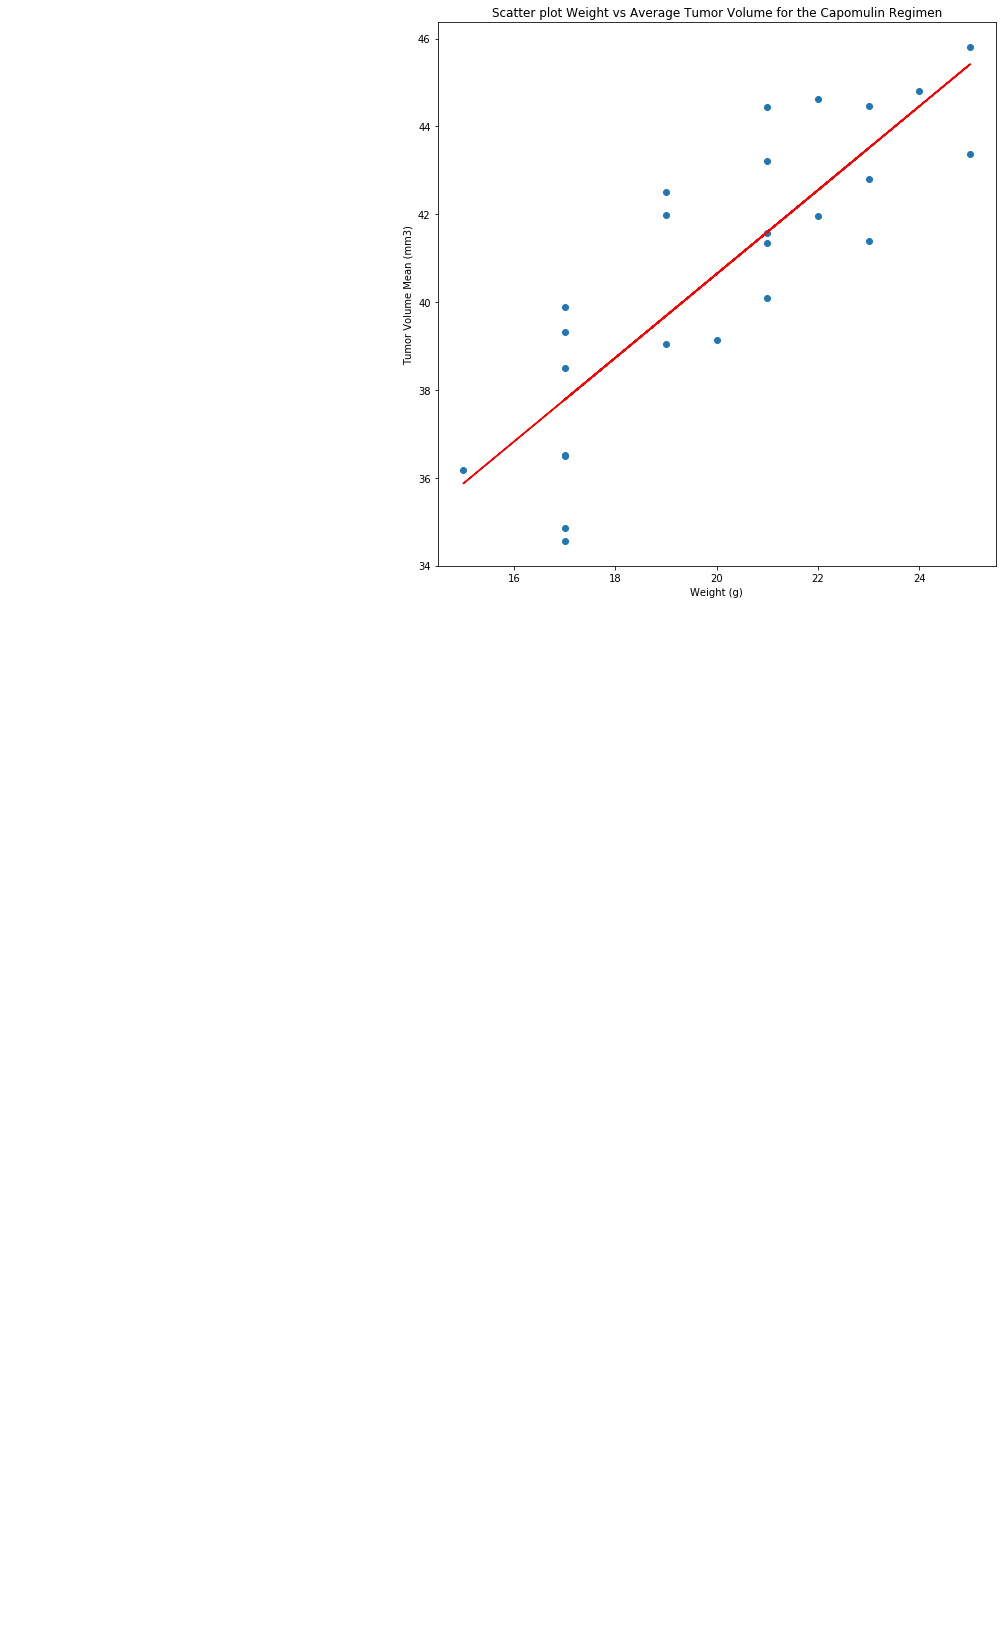

In [857]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


#loc the weight and tumor avg by Capomulin regimen
df_scatter = df_mouse_metadata.loc[df_mouse_metadata['Drug Regimen'] == "Capomulin", ['Weight (g)','Tumor Volume Mean (mm3)']]
series_scatter_weight = df_scatter['Weight (g)']
series_scatter_tumorVolmean = df_scatter['Tumor Volume Mean (mm3)']
plt.figure(figsize=(10,10))
#labelled the scatter plot
plt.title('Scatter plot Weight vs Average Tumor Volume for the Capomulin Regimen')
plt.scatter(series_scatter_weight, series_scatter_tumorVolmean)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume Mean (mm3)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(series_scatter_weight, series_scatter_tumorVolmean)
regress_values = series_scatter_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(series_scatter_weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")

plt.show()



# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(series_scatter_weight,series_scatter_tumorVolmean)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

In [858]:
correlation = st.pearsonr(series_scatter_weight,series_scatter_tumorVolmean)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

The correlation coefficient between both factors is 0.84
